The goal of my capstone is to create a model that will allow me to predict the prices of stocks and predict the prices of bitcoin and to understand what correlations (if any) they have, my goals include trying to find correlations between the stock market and bitcoin market, is there a positive or negative correlation or no correlation at all?
A potential risk to my research is even if there is correlation that may not necessarily be causation. I'm planning on running a multitude of tests and models including a linear regression model, lasso regression model, random forest regressor and a few others.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, \
HashingVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, StandardScaler
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1 Load the Datasets

In [197]:
df2 = pd.read_csv('~/Downloads/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2017-05-31.csv')

In [361]:
df = pd.read_csv('~/lesson-hierarchical-clustering-evaluation/datasets/dow_jones_index.csv')

In [362]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [199]:
df2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2 Exploratory Data Analysis

In [200]:
df2 = df2.dropna()

In [363]:
df = df.dropna()

In [202]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'],unit='s')

In [203]:
df2.corr()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999997,0.999996,0.999996,0.047719,0.350842,0.999998
High,0.999997,1.000000,0.999992,0.999997,0.048171,0.351481,0.999998
Low,0.999996,0.999992,1.000000,0.999996,0.046924,0.349698,0.999998
Close,0.999996,0.999997,0.999996,1.000000,0.047556,0.350635,0.999999
Volume_(BTC),0.047719,0.048171,0.046924,0.047556,1.000000,0.757953,0.047523
Volume_(Currency),0.350842,0.351481,0.349698,0.350635,0.757953,1.000000,0.350560
Weighted_Price,0.999998,0.999998,0.999998,0.999999,0.047523,0.350560,1.000000


In [364]:
df.corr()

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
quarter,1.000000,-0.037889,-0.076259,0.023662,-0.057302,0.000098,-0.020749,-0.007963
volume,-0.037889,1.000000,-0.173245,0.181672,0.887631,-0.091106,-0.057734,-0.269797
percent_change_price,-0.076259,-0.173245,1.000000,-0.234496,-0.068675,0.020639,-0.009060,0.049963
percent_change_volume_over_last_wk,0.023662,0.181672,-0.234496,1.000000,-0.129519,0.013181,-0.033348,-0.017486
previous_weeks_volume,-0.057302,0.887631,-0.068675,-0.129519,1.000000,-0.102408,-0.047727,-0.270266
percent_change_next_weeks_price,0.000098,-0.091106,0.020639,0.013181,-0.102408,1.000000,-0.028797,0.103009
days_to_next_dividend,-0.020749,-0.057734,-0.009060,-0.033348,-0.047727,-0.028797,1.000000,0.119733
percent_return_next_dividend,-0.007963,-0.269797,0.049963,-0.017486,-0.270266,0.103009,0.119733,1.000000


In order to utilize the data properly it is necessary to remove the nullvalues first followed by a removal of the "$"s, in addition I will change the important columns into floats and add on more feature columns for the modeling further along. I also will take the differences of the past two periods and add those to the final dataset.

In [365]:
df['Percent Change Price'] = df['percent_change_price'].diff(periods = 2)

In [366]:
df['Returned Percentage Next Dividend'] = df['percent_return_next_dividend'].diff(periods = 2)

In [367]:
df['Days Until Next Dividend'] = df['days_to_next_dividend'].diff(periods = 2)

In [368]:
df['Percent Change of Next Weeks Price'] = df['percent_change_next_weeks_price'].diff(periods = 2)

In [369]:
df['next_weeks_close'] = df['next_weeks_close'].str.replace('$', '')

In [370]:
df['next_weeks_close'] = df['next_weeks_close'].astype(float)

In [371]:
df['next_weeks_open'] = df['next_weeks_open'].str.replace('$', '')

In [372]:
df['Next Weeks Close'] = df['next_weeks_close'].diff(periods = 2)

In [373]:
df['next_weeks_open'] = df['next_weeks_open'].astype(float)

In [374]:
df['Next Weeks Open'] = df['next_weeks_open'].diff(periods = 2)

In [375]:
df['open'] = df['open'].str.replace('$', '')

In [376]:
df['close'] = df['close'].str.replace('$', '')

In [377]:
df['high'] = df['high'].str.replace('$', '')

In [378]:
df['low'] = df['low'].str.replace('$', '')

In [379]:
df['open'] = df['open'].astype(float)

In [380]:
df['close'] = df['close'].astype(float)

In [381]:
df['low'] = df['low'].astype(float)

In [382]:
df['high'] = df['high'].astype(float)

In [383]:
df['High'] = df['high'].diff(periods = 2)

In [384]:
df['Low'] = df['low'].diff(periods = 2)

In [385]:
df['Close'] = df['close'].diff(periods = 2)

In [386]:
df['Open'] = df['open'].diff(periods = 2)

In [387]:
df = df.drop('open', 1)

In [388]:
df = df.drop('high', 1)

In [389]:
df = df.drop('low', 1)

In [390]:
df = df.drop('close', 1)

In [391]:
df = df.drop('next_weeks_open', 1)

In [392]:
df = df.drop('next_weeks_close', 1)

In [393]:
df = df.drop('percent_change_next_weeks_price', 1)

In [394]:
df = df.drop('days_to_next_dividend', 1)

In [395]:
df = df.drop('percent_return_next_dividend', 1)

In [396]:
df['Yest.Open'] = df['Open'].shift(periods = 2)

In [397]:
df['Yest.Close'] = df['Close'].shift(periods = 2)

In [398]:
df['Yest.High'] = df['High'].shift(periods = 2)

In [399]:
df['Yest.Low'] = df['Low'].shift(periods = 2)

In [400]:
df['Yest.Percent.Change.Price'] = df['Percent Change Price'].shift(periods = 2)

In [401]:
df = df.iloc[4:,:]

In [402]:
df.head()

,quarter,stock,date,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,Percent Change Price,Returned Percentage Next Dividend,Days Until Next Dividend,...,Next Weeks Open,High,Low,Close,Open,Yest.Open,Yest.Close,Yest.High,Yest.Low,Yest.Percent.Change.Price
5,1,AA,2/11/2011,114691279,0.230814,-25.712195,154387761.0,-1.407496,-0.013277,85.0,...,1.21,0.85,1.15,1.24,1.46,-0.84,0.16,-0.08,0.18,6.066800
6,1,AA,2/18/2011,80023895,-0.632547,-30.226696,114691279.0,-6.565797,-0.001418,-14.0,...,-0.35,0.29,1.10,0.14,1.21,-0.01,1.35,1.01,0.58,8.403910
7,1,AA,2/25/2011,132981863,-1.766780,66.177694,80023895.0,-1.997594,0.007144,-14.0,...,-0.58,-0.33,-1.01,-0.69,-0.35,1.46,1.24,0.85,1.15,-1.407496
8,1,AA,3/4/2011,109493077,-1.368230,-17.663150,132981863.0,-0.735683,0.007330,-14.0,...,-0.40,-0.74,-1.15,-0.70,-0.58,1.21,0.14,0.29,1.10,-6.565797
9,1,AA,3/11/2011,114332562,-3.317250,4.419900,109493077.0,-1.550470,0.007293,-14.0,...,-0.86,-0.40,-0.54,-0.65,-0.40,-0.35,-0.69,-0.33,-1.01,-1.997594


# Looking at Correlation

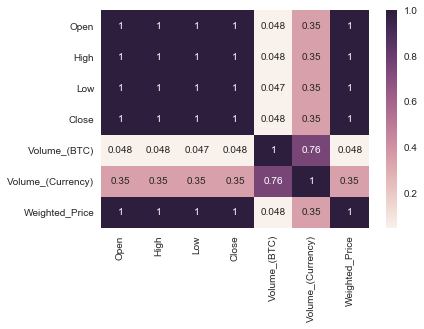

In [243]:
sns.heatmap(df2.corr(), annot=True);

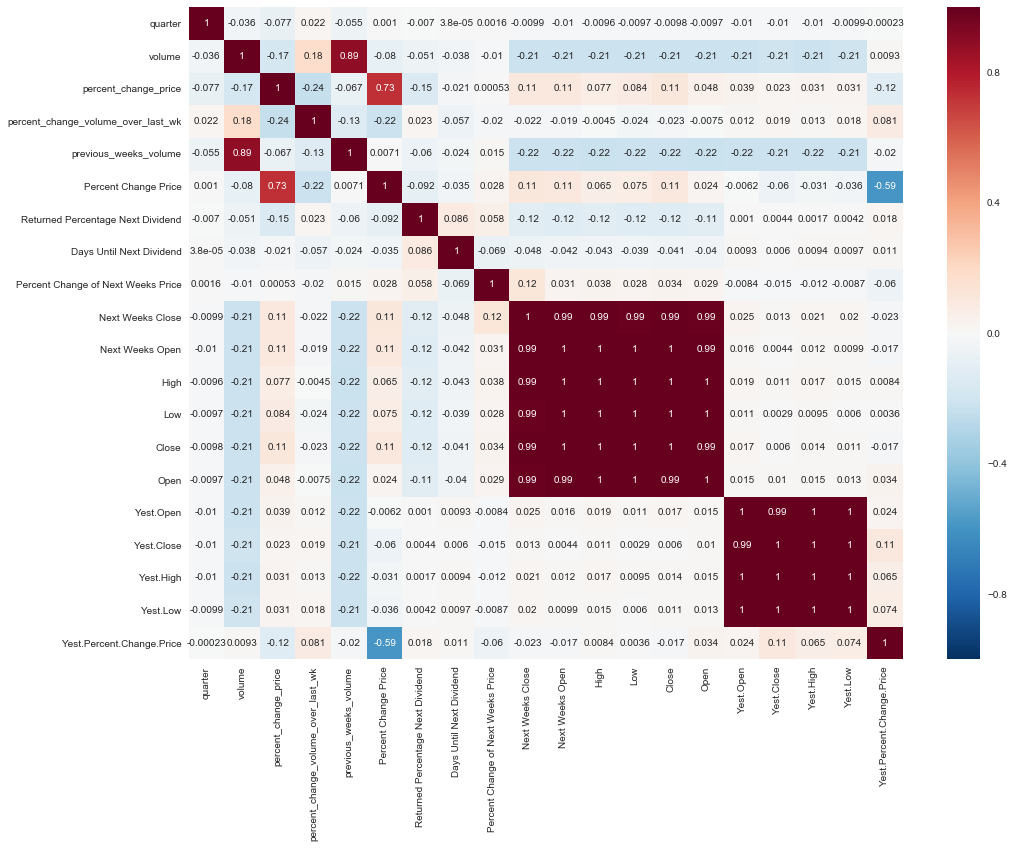

In [244]:
plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(), annot=True);
#plt.xticks(rotation)

In [246]:
import statsmodels.api as sm

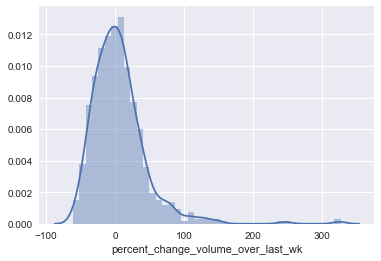

In [247]:
sns.distplot(df['percent_change_volume_over_last_wk'])

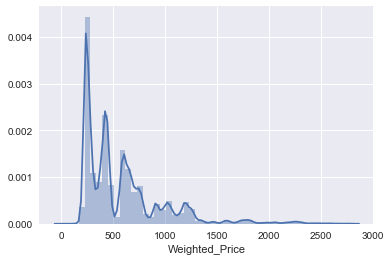

In [248]:
sns.distplot(df2['Weighted_Price'])

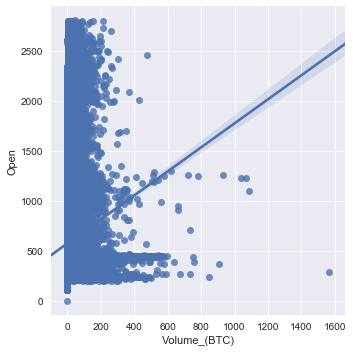

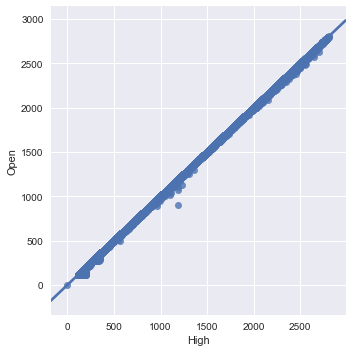

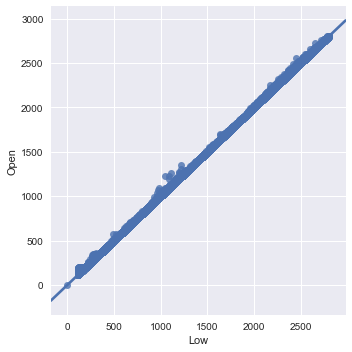

In [249]:
sns.lmplot(x='Volume_(BTC)', y='Open', data=df2)
plt.show()
sns.lmplot(x='High', y='Open', data=df2)
plt.show()
sns.lmplot(x='Low', y='Open', data=df2)
plt.show()

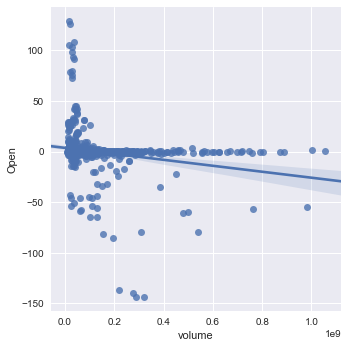

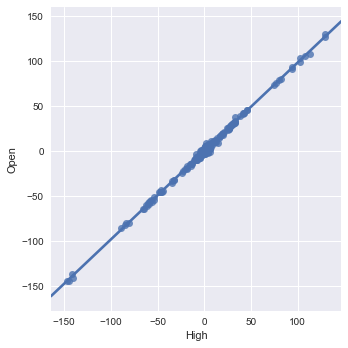

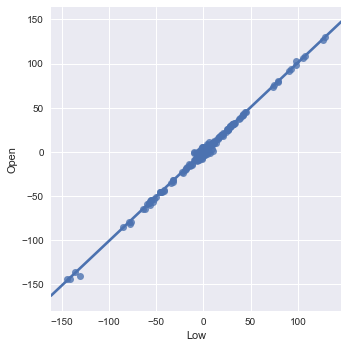

In [59]:
sns.lmplot(x='volume', y='Open', data=df)
plt.show()
sns.lmplot(x='High', y='Open', data=df)
plt.show()
sns.lmplot(x='Low', y='Open', data=df)
plt.show()

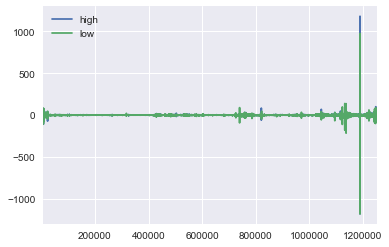

In [449]:
df2[['high', 'low']].plot();

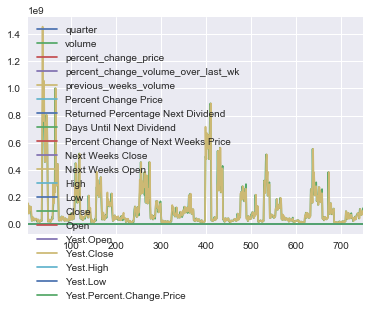

In [403]:
df.plot()

# Applying Models to the Data

In [404]:
df['Close'] = df['Close'].astype(int)

In [405]:
X_train, X_test, y_train,  y_test = \
    train_test_split(df[['percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume']],
                    (df['Close']>0), test_size=.4, 
                    random_state = 42)b

I chose these columns because based on previous analysis it is clear that there are strong correlations between the percentage changes in the price and the closing price, the previous weeks volume is also an important indicator.

In [406]:
X_test.shape

(287, 3)

In [407]:
y_train.value_counts()

False    332
True      97
Name: Close, dtype: int64

In [408]:
mpipe = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=2))

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('fit', LogisticRegressionCV(cv=2))
])

In [409]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fit', LogisticRegressionCV(Cs=10, class_weight=None, cv=2, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [410]:
pipe.score(X_test, y_test)

0.78397212543554007

In [411]:
y_pred = pipe.predict(X_test)

In [412]:
confusion_matrix(y_test, y_pred)

array([[178,  15],
       [ 47,  47]])

This tells us that there are 178 true negatives, 15 false positives, 47 false negatives and also 47 true positives

In [413]:
df['Close'] = df['Close'].astype(float)

In [414]:
arima_model = ARIMA(df['Close'].values, [2, 1,2])

result =arima_model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  715
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2962.930
Method:                       css-mle   S.D. of innovations             15.173
Date:                Sun, 17 Dec 2017   AIC                           5937.860
Time:                        22:33:02   BIC                           5965.294
Sample:                             1   HQIC                          5948.455
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.005     -0.053      0.958      -0.011       0.010
ar.L1.D.y      0.0271      0.039      0.696      0.487      -0.049       0.103
ar.L2.D.y     -0.0315      0.039     -0.811      0.4

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

In [415]:
preds = result.predict(100,105)

In [416]:
fcast = np.concatenate((df.Close,preds),axis=0)

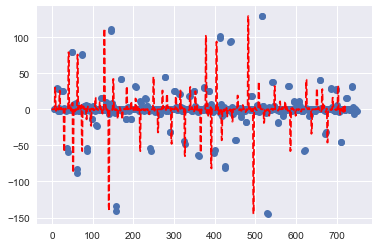

In [417]:
plt.plot(df.Close, 'o', fcast, 'r--')

In [418]:
arima_model = ARIMA(df['High'].values, [2, 1,2])

result =arima_model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  715
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2967.124
Method:                       css-mle   S.D. of innovations             15.256
Date:                Sun, 17 Dec 2017   AIC                           5946.247
Time:                        22:33:11   BIC                           5973.681
Sample:                             1   HQIC                          5956.841
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.006     -0.057      0.955      -0.011       0.011
ar.L1.D.y      0.0302      0.039      0.777      0.437      -0.046       0.106
ar.L2.D.y     -0.0144      0.039     -0.371      0.7

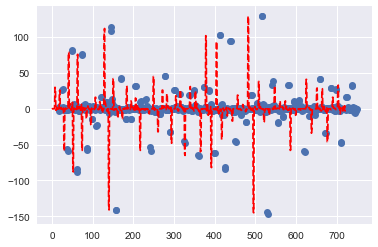

In [452]:
plt.plot(df.High, 'o', fcast, 'r--')

# Some Further EDA

In [265]:
preds = result.predict(100,105)

In [266]:
df2['close'] = df2['Close'].diff(periods = 2)

In [267]:
df2['open'] = df2['Open'].diff(periods = 2)

In [268]:
df2['low'] = df2['Low'].diff(periods = 2)

In [269]:
df2['high'] = df2['High'].diff(periods = 2)

In [270]:
df2['volume(BTC)'] = df2['Volume_(BTC)'].diff(periods = 2)

In [271]:
df2['volume(currency)'] = df2['Volume_(Currency)'].diff(periods = 2)

In [272]:
df2['weighted price'] = df2['Weighted_Price'].diff(periods = 2)

In [273]:
df2 = df2.drop('Open', 1)

In [274]:
df2 = df2.drop('High', 1)

In [275]:
df2 = df2.drop('Low', 1)

In [276]:
df2 = df2.drop('Close', 1)

In [277]:
df2 = df2.drop('Volume_(Currency)', 1)

In [278]:
df2 = df2.drop('Volume_(BTC)', 1)

In [279]:
df2 = df2.drop('Weighted_Price', 1)

In [280]:
df2['Yest.Open'] = df2['open'].shift(periods = 2)

In [281]:
df2['Yest.Low'] = df2['low'].shift(periods = 2)

In [282]:
df2['Yest.High'] = df2['high'].shift(periods = 2)

In [283]:
df2['Yest.Weighted.Price'] = df2['weighted price'].shift(periods = 2)

In [284]:
df2['Yest.Volume(BTC)'] = df2['volume(BTC)'].shift(periods = 2)

In [285]:
df2['Yest.Volume(Currency)'] = df2['volume(currency)'].shift(periods = 2)

In [286]:
df2.head()

,Timestamp,close,open,low,high,volume(BTC),volume(currency),weighted price,Yest.Open,Yest.Low,Yest.High,Yest.Weighted.Price,Yest.Volume(BTC),Yest.Volume(Currency)
0,2014-12-01 05:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-12-01 05:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2014-12-01 06:24:00,70.0,70.0,70.0,70.0,0.000000,0.70000,70.0,NaN,NaN,NaN,NaN,NaN,NaN
77,2014-12-01 06:50:00,70.0,70.0,70.0,70.0,0.016556,6.82555,70.0,NaN,NaN,NaN,NaN,NaN,NaN
1436,2014-12-02 05:29:00,7.0,7.0,7.0,7.0,0.000000,0.07000,7.0,70.0,70.0,70.0,70.0,0.0,0.7


In [287]:
df2 = df2.iloc[4:,:]

# Further Testing

In [288]:
X_train, X_test, y_train, y_test = \
    train_test_split(df2[['Yest.Open', 'Yest.Low']].values, df2['open'].values)

In [289]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(861218, 2) (287073, 2) (861218,) (287073,)


In [290]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.1694924997


In [291]:
X_train, X_test, y_train, y_test = \
    train_test_split(df2[['Yest.High']].values, df2['open'].values)

In [292]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(861218, 1) (287073, 1) (861218,) (287073,)


In [293]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.0516843303437


In [294]:
X_train, X_test, y_train, y_test = \
    train_test_split(df2[['Yest.Volume(BTC)']].values, df2['open'].values)

In [295]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(861218, 1) (287073, 1) (861218,) (287073,)


In [296]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.00164976556069


In [297]:
X_train, X_test, y_train, y_test = \
    train_test_split(df2[['Yest.Weighted.Price']].values, df2['open'].values)

In [298]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(861218, 1) (287073, 1) (861218,) (287073,)


In [299]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.0287645125038


In [300]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

0.701779839401


In [301]:
print(rfr.score(X_test, y_test))

-0.7036566309


In [302]:
print(lr.score(X_test, y_test))

-0.110087639025


Clearly the dataset is overfit 

In [303]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
print(abr.score(X_train, y_train))

0.409856381046


In [304]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[['Yest.Open', 'Yest.Low']].values, df['Open'].values)

In [305]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 2) (179, 2) (537,) (179,)


In [306]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.00342095111797


In [307]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[['Yest.High']].values, df['Open'].values)

In [308]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 1) (179, 1) (537,) (179,)


In [309]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.000310199844289


In [310]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[['Yest.Percent.Change.Price']].values, df['Open'].values)

In [311]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 1) (179, 1) (537,) (179,)


In [312]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.000599952530177


In [313]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

0.708689083532


In [314]:
print(rfr.score(X_test, y_test))

-0.409541350702


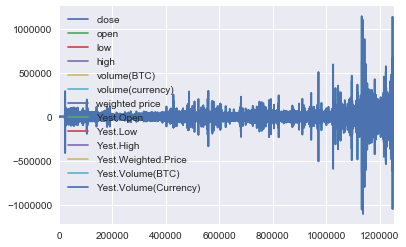

In [315]:
df2.plot()

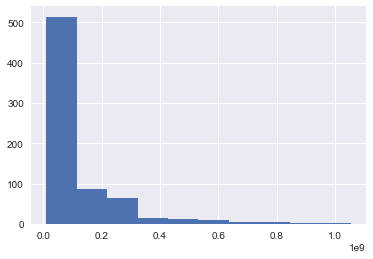

In [316]:
plt.hist(df['volume']);

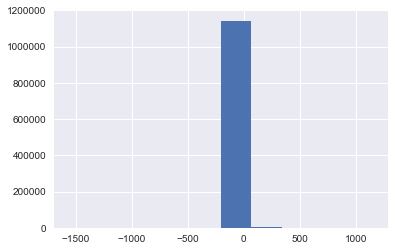

In [460]:
plt.hist(df2['volume(BTC)']);

This tells us that the volume for the DJIA has stayed fairly consistent

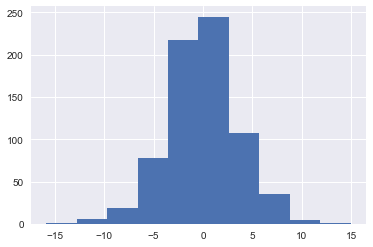

In [317]:
plt.hist(df['Yest.Percent.Change.Price']);

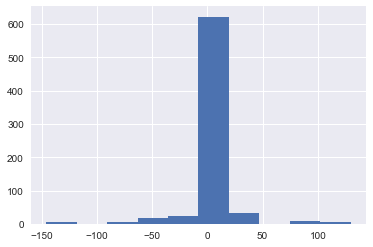

In [318]:
plt.hist(df['Next Weeks Open']);

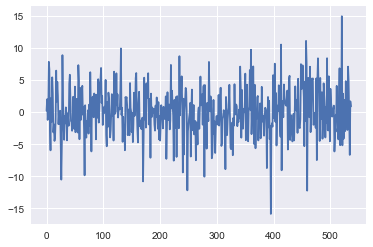

In [319]:
plt.plot(X_train)

In [354]:
df2.head()

,Timestamp,close,open,low,high,volume(BTC),volume(currency),weighted price,Yest.Open,Yest.Low,Yest.High,Yest.Weighted.Price,Yest.Volume(BTC),Yest.Volume(Currency),high_avg_2days,high_avg_4days,high_avg_6days,high_avg_8days,high_avg_10days
4114,2014-12-12 03:44:00,-19.00,-18.50,-19.00,-18.50,1.04,373.9450,-18.545872,-19.00,-19.00,-19.00,-19.000000,0.04,14.9700,-7.005,-11.8800,-4.935000,-3.69000,-3.051
4116,2014-12-12 03:46:00,-14.99,-14.99,-14.99,-14.99,1.99,696.3501,-14.990000,4.49,4.49,4.49,4.490000,0.00,0.0449,-16.745,-12.0000,-7.085000,-5.57500,-4.451
4117,2014-12-18 20:56:00,-20.00,-15.50,-20.00,-15.50,0.91,292.1050,-17.954128,-18.50,-19.00,-18.50,-18.545872,1.04,373.9450,-15.245,-11.1250,-13.001667,-7.51250,-6.001
4118,2015-01-08 01:24:00,10.00,10.00,10.00,10.00,-1.99,-696.4000,10.000000,-14.99,-14.99,-14.99,-14.990000,1.99,696.3501,-2.750,-9.7475,-8.916667,-6.00125,-5.010
4121,2015-01-08 01:27:00,-63.66,-73.16,-68.16,-68.66,-1.98,-679.5182,-68.410000,-15.50,-20.00,-15.50,-17.954128,0.91,292.1050,-29.330,-22.2875,-17.193333,-17.08375,-11.876


In [349]:
df2 = df2.iloc[10:,:]

In [330]:
df2['high_avg_2days'] = df2['high'].rolling(window=2).mean()

In [331]:
df2['high_avg_4days'] = df2['high'].rolling(window=4).mean()

In [332]:
df2['high_avg_6days'] = df2['high'].rolling(window=6).mean()

In [333]:
df2['high_avg_8days'] = df2['high'].rolling(window=8).mean()

In [334]:
df2['high_avg_10days'] = df2['high'].rolling(window=10).mean()

In [337]:
df2.head()

,Timestamp,close,open,low,high,volume(BTC),volume(currency),weighted price,Yest.Open,Yest.Low,Yest.High,Yest.Weighted.Price,Yest.Volume(BTC),Yest.Volume(Currency),high_avg_2days,high_avg_4days,high_avg_6days,high_avg_8days,high_avg_10days
3659,2014-12-03 18:32:00,0.00,0.00,0.00,0.00,0.283916,107.320172,0.00,0.00,0.00,0.00,0.00,0.056084,21.199828,0.050,0.0000,0.000000,0.00000,0.900
3753,2014-12-03 20:06:00,-0.99,-0.99,-0.99,-0.99,0.089476,33.722845,-0.99,0.10,0.10,0.10,0.10,0.000524,0.199155,-0.495,-0.2225,-0.165000,-0.12375,0.001
3922,2014-12-03 22:55:00,0.00,0.00,0.00,0.00,-0.340000,-128.520000,0.00,0.00,0.00,0.00,0.00,0.283916,107.320172,-0.495,-0.2225,-0.165000,-0.12375,-0.099
4095,2014-12-04 01:48:00,0.09,0.09,0.09,0.09,-0.090000,-33.930000,0.09,-0.99,-0.99,-0.99,-0.99,0.089476,33.722845,0.045,-0.2250,-0.133333,-0.11250,-0.090
4096,2014-12-06 01:41:00,0.00,0.00,0.00,0.00,0.005000,1.890000,0.00,0.00,0.00,0.00,0.00,-0.340000,-128.520000,0.045,-0.2250,-0.133333,-0.11250,-0.090


In [336]:
df2 = df2.iloc[10:,:]

In [338]:
X_train, X_test, y_train, y_test = \
    train_test_split(df2[['high_avg_2days', 'high_avg_4days']].values, df2['open'].values)

In [339]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(861210, 2) (287071, 2) (861210,) (287071,)


In [340]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.629480395981


In [341]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

0.905939203268


In [342]:
rfr = RandomForestRegressor()
rfr.fit(X_test, y_test)
print(rfr.score(X_test, y_test))

0.799589003449


This shows that the model is no longer overfit which means that the addition of the new features certainly had a positive impact on the modeling.

In [428]:
df.head()

,quarter,stock,date,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,Percent Change Price,Returned Percentage Next Dividend,Days Until Next Dividend,...,Close,Open,Yest.Open,Yest.Close,Yest.High,Yest.Low,Yest.Percent.Change.Price,volume_average_10_days,volume_average_5_days,volume_average_2_days
16,1,AXP,2/4/2011,39501680,-0.702470,-23.189240,51427274.0,-0.637295,0.019467,-14.0,...,-2.0,-1.90,29.65,28.91,29.47,28.45,-4.399725,81842329.2,50243557.4,45464477.0
17,1,AXP,2/11/2011,43746998,6.346680,10.747183,39501680.0,11.102380,-0.025370,-14.0,...,2.0,-2.09,1.85,-2.39,0.02,-0.59,-9.393710,78214639.5,39882878.6,41624339.0
18,1,AXP,2/18/2011,28564910,-1.917280,-34.704297,43746998.0,-1.214810,-0.015427,-14.0,...,1.0,2.29,-1.90,-2.18,-2.48,-1.56,-0.637295,67772944.2,40413118.0,36155954.0
19,1,AXP,2/25/2011,39654146,-3.137520,38.821183,28564910.0,-9.484200,0.028481,-14.0,...,-3.0,0.98,-2.09,2.89,0.52,0.46,11.102380,60789051.1,40579001.6,34109528.0
20,1,AXP,3/4/2011,38985037,-0.022868,-1.687362,39654146.0,1.894412,0.016367,-14.0,...,-1.0,-2.69,2.29,1.71,2.70,2.38,-1.214810,53254298.6,38090554.2,39319591.5


In [420]:
df['volume_average_10_days'] = df['volume'].rolling(window=10).mean()

In [422]:
df['volume_average_5_days'] = df['volume'].rolling(window=5).mean()

In [424]:
df['volume_average_2_days'] = df['volume'].rolling(window=2).mean()

In [427]:
df = df.iloc[10:,:]

In [429]:
X_train, X_test, y_train,  y_test = \
    train_test_split(df[['volume_average_10_days', 'volume_average_5_days', 'volume_average_2_days']],
                    (df['Close']>0), test_size=.4, 
                    random_state = 42)

In [430]:
X_test.shape

(283, 3)

In [431]:
y_train.value_counts()

False    314
True     109
Name: Close, dtype: int64

In [432]:
mpipe = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=2))

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('fit', LogisticRegressionCV(cv=2))
])

In [433]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fit', LogisticRegressionCV(Cs=10, class_weight=None, cv=2, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [434]:
pipe.score(X_test, y_test)

0.73144876325088337

In [435]:
y_pred = pipe.predict(X_test)

In [436]:
confusion_matrix(y_test, y_pred)

array([[202,   3],
       [ 73,   5]])

This tells us that there are 202 true negatives, 3 false positives, 73 false negatives and 5 true positives

In [437]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.0487826455368


In [439]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))

0.821041313621


In [440]:
rfr = RandomForestRegressor()
rfr.fit(X_test, y_test)
print(rfr.score(X_test, y_test))

0.810094434021


Clearly adding more features to the data set is a consistent fix to the model accuracy.

Despite the volatility in the Bitcoin dataset the predictions were more accurate than those of the Dow Jones

In [451]:
baseline = 1 - y_test.mean()
baseline

0.72438162544169615

Although the first models I ran were under the baseline ultimately after adding more features the model was able to beat baseline for the random forest regression with both datasets. In the future I will add further averages to the set to try and improve the accuracy. 